In [1]:
import pandas as pd
df=pd.read_csv('data.csv')
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           4600 non-null   object 
 1   price          4600 non-null   float64
 2   bedrooms       4600 non-null   float64
 3   bathrooms      4600 non-null   float64
 4   sqft_living    4600 non-null   int64  
 5   sqft_lot       4600 non-null   int64  
 6   floors         4600 non-null   float64
 7   waterfront     4600 non-null   int64  
 8   view           4600 non-null   int64  
 9   condition      4600 non-null   int64  
 10  sqft_above     4600 non-null   int64  
 11  sqft_basement  4600 non-null   int64  
 12  yr_built       4600 non-null   int64  
 13  yr_renovated   4600 non-null   int64  
 14  street         4600 non-null   object 
 15  city           4600 non-null   object 
 16  statezip       4600 non-null   object 
 17  country        4600 non-null   object 
dtypes: float

In [5]:
df = df[['price', 'bedrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated']]
df

,price,bedrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated
0,3.130000e+05,3.0,1340,7912,1.5,0,0,3,1340,0,1955,2005
1,2.384000e+06,5.0,3650,9050,2.0,0,4,5,3370,280,1921,0
2,3.420000e+05,3.0,1930,11947,1.0,0,0,4,1930,0,1966,0
3,4.200000e+05,3.0,2000,8030,1.0,0,0,4,1000,1000,1963,0
4,5.500000e+05,4.0,1940,10500,1.0,0,0,4,1140,800,1976,1992
...,...,...,...,...,...,...,...,...,...,...,...,...
4595,3.081667e+05,3.0,1510,6360,1.0,0,0,4,1510,0,1954,1979
4596,5.343333e+05,3.0,1460,7573,2.0,0,0,3,1460,0,1983,2009
4597,4.169042e+05,3.0,3010,7014,2.0,0,0,3,3010,0,2009,0
4598,2.034000e+05,4.0,2090,6630,1.0,0,0,3,1070,1020,1974,0


In [8]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(df.drop(labels=['price'], axis=1),
    df['price'],
    test_size=0.3,
    random_state=0)
from sklearn.feature_selection import mutual_info_regression
mutual_info = mutual_info_regression(X_train.fillna(0), y_train)
mutual_info

array([0.08158798, 0.33032839, 0.06807244, 0.06795146, 0.        ,
       0.06670587, 0.01579037, 0.22652578, 0.06182033, 0.07241123,
       0.        ])

In [9]:
mutual_info = pd.Series(mutual_info)
mutual_info.index = X_train.columns
mutual_info.sort_values(ascending=False)

sqft_living      0.330328
sqft_above       0.226526
bedrooms         0.081588
yr_built         0.072411
sqft_lot         0.068072
floors           0.067951
view             0.066706
sqft_basement    0.061820
condition        0.015790
waterfront       0.000000
yr_renovated     0.000000
dtype: float64

<AxesSubplot: >

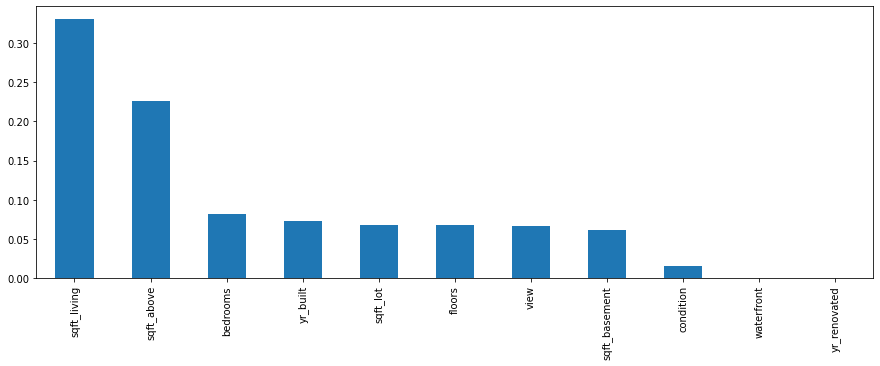

In [10]:
mutual_info.sort_values(ascending=False).plot.bar(figsize=(15,5))

In [11]:
from sklearn.feature_selection import SelectPercentile
selected_top_columns = SelectPercentile(mutual_info_regression, percentile=20)
selected_top_columns.fit(X_train.fillna(0), y_train)
selected_top_columns.get_support()

array([False,  True, False, False, False, False, False,  True, False,
       False, False])

In [12]:
X_train.columns[selected_top_columns.get_support()]

Index(['sqft_living', 'sqft_above'], dtype='object')